# Bayesian network reconstruction - Gandy Veraart 2016

Authors: Axel Gandy and Luitgard A.M. Veraart

https://CRAN.R-project.org/package=systemicrisk     
https://github.com/cran/systemicrisk   
https://github.com/cran/systemicrisk/blob/master/vignettes/Introduction.Rmd   

An example with 3 banks
=======================
This document describes a toy example for the use of the package `systemicrisk`.

In [1]:
install.packages("systemicrisk")


The downloaded binary packages are in
	/var/folders/kl/l6gcmlzs2t7736h_y8m097_c0000gn/T//RtmpCKNWpA/downloaded_packages


In [2]:
library(systemicrisk)

Suppose we are dealing with 3 banks and that they have total interbank
liabilities/assets given by the following:

In [17]:
l <- c(1,2.5,3)
a <- c(0.7,2.7,3.1)

Suppose we are assuming $p=0.5$ and $\lambda=0.25$.
Then we can run the Gibbs sampler to get a sample of the liabilities
matrix condtional on $l$ and $a$.

In [18]:
L <- sample_ERE(l,a,p=0.5,lambda=0.25,nsamples=200,thin=20,burnin=10)

Some examples of the matrices generated are below.

In [19]:
L[[1]]
L[[2]]
L[[3]]

0.0000000,0.1184424,0.8815576
0.2815576,0.0000000,2.2184424
0.4184424,2.5815576,0.0000000


0.0,0.0,1.0
0.4,0.0,2.1
0.3,2.7,0.0


0.0,0.4,0.6
0.0,0.0,2.5
0.7,2.3,0.0


In [20]:
L

0.0000000,0.1184424,0.8815576
0.2815576,0.0000000,2.2184424
0.4184424,2.5815576,0.0000000
0.0,0.0,1.0
0.4,0.0,2.1
0.3,2.7,0.0
0.0,0.4,0.6
0.0,0.0,2.5
0.7,2.3,0.0
0.0,0.4,0.6
0.0,0.0,2.5


Diagnostic of the R-output
--------------------------
All the caveats of MCMC algorithms apply. In particular it is useful
to plot the paths of the individual liabilities, which we do below
for the liabilities of Bank 1 towards Bank 2.

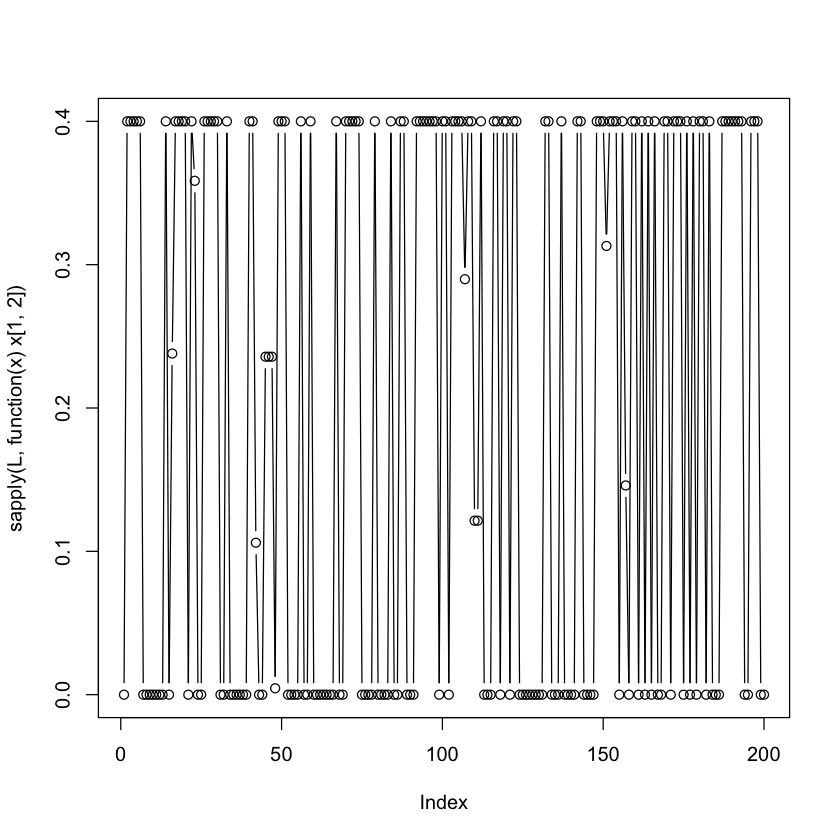

In [6]:
plot(sapply(L,function(x)x[1,2]),type="b")

Also, the autocorrelation function should decline quickly.

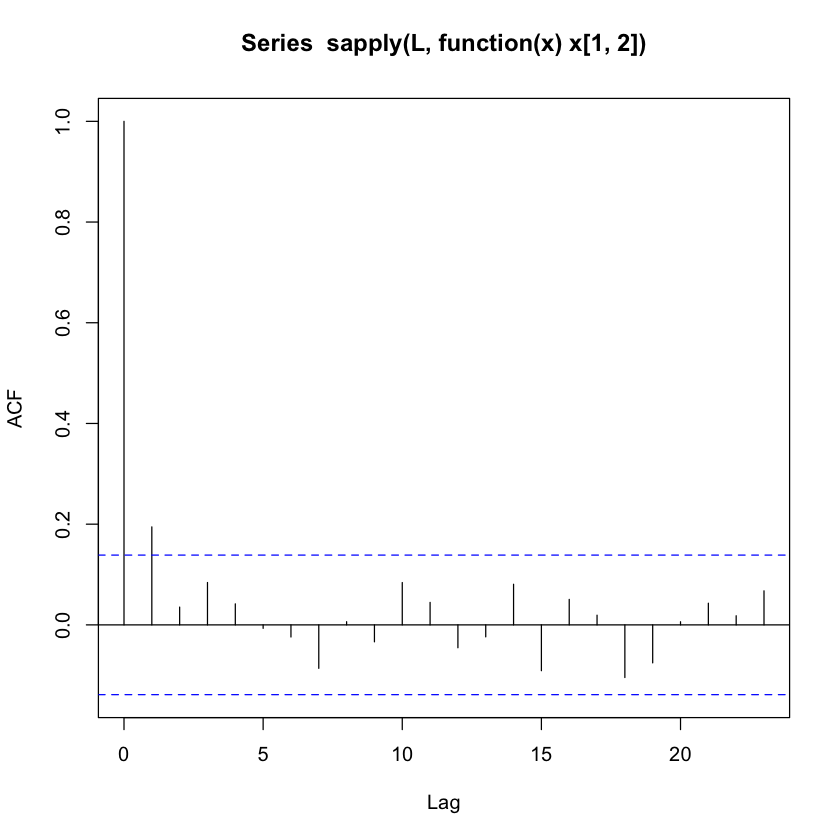

In [7]:
acf(sapply(L,function(x)x[1,2]))

In this case it decays quickly below the white-noise threshold (the
horizontal dashed lines).

Default of banks
----------------
To be able to talk about default of banks  we need to know the
external assets and liabilities of the banks.
Suppose we assume the following:

In [8]:
ea <- c(1,1,1)
el <- c(1,1,1)

In [9]:
default(L[[1]],ea=ea,el=el)$defaultind
default(L[[2]],ea=ea,el=el)$defaultind
default(L[[3]],ea=ea,el=el)$defaultind

[1] 1 0 1

[1] 1 0 0

[1] 1 0 0

Below we apply two different default  algorithms (without default costs and with default costs) to the liabilities matrices and compute the average number of times each bank defaults.

In [10]:
rowMeans(sapply(L, function(Lakt) default(Lakt,ea=ea,el=el)$defaultind))
rowMeans(sapply(L, function(Lakt) default(Lakt,ea=ea,el=el,alpha=0.98,beta=0.98)$defaultind))

[1] 1.00 0.00 0.53

[1] 1 0 1

# Further reading

[1] Barucca, Paolo. Rogersveraart: Matlab Implementation of the Algorithm Described in Rogers and Veraart 2013. Matlab, 2017. https://github.com/paolobarucca/rogersveraart.  
[2] Gandy, Axel, and Luitgard A. M. Veraart. “A Bayesian Methodology for Systemic Risk Assessment in Financial Networks.” SSRN Scholarly Paper. Rochester, NY: Social Science Research Network, May 3, 2016. http://papers.ssrn.com/abstract=2580869.   
[3] ———. “A Bayesian Methodology for Systemic Risk Assessment in Financial Networks.” 2015. https://www.stochastik.uni-hannover.de/fileadmin/institut/pdf/LUH_Gandy.pdf.   
[4] Veraart, Axel Gandy and Luitgard A. M. Systemicrisk: A Toolbox for Systemic Risk (version 0.3), 2015. https://cran.r-project.org/web/packages/systemicrisk/index.html.   
[5] Gandy, Axel, and Luitgard A. M. Veraart. Systemicrisk — A Toolbox for Systemic Risk. HTML. 2015. Reprint, cran, 2017. https://github.com/cran/systemicrisk.

   